# 파이토치에서의 경사하강법

In [3]:
import torch
X = torch.Tensor(2, 3)
X

tensor([[3.4740e-35, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [5]:
X = torch.Tensor([[1, 2, 3], [4, 5, 6]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
x_tensor = torch.tensor(data=[2.0, 3.0], requires_grad=True)
x_tensor

tensor([2., 3.], requires_grad=True)

In [7]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [8]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [9]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
y = 2*x+3
y_noise = y + noise

In [13]:
import matplotlib.pyplot as plt

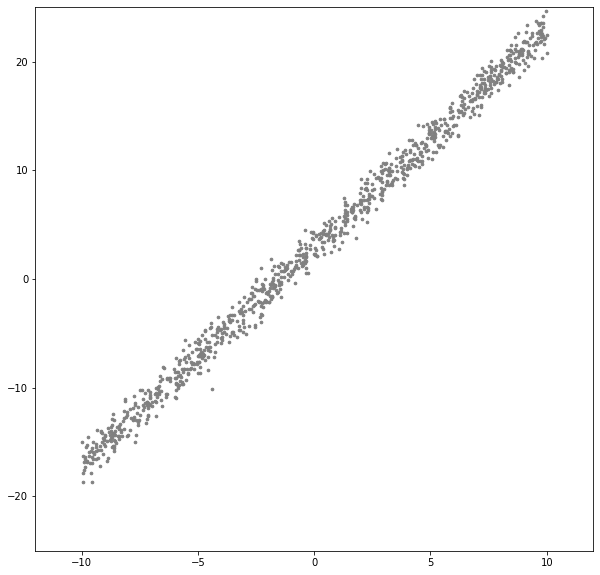

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")
plt.axis([-12, 12, -25, 25])
plt.show()

In [10]:
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

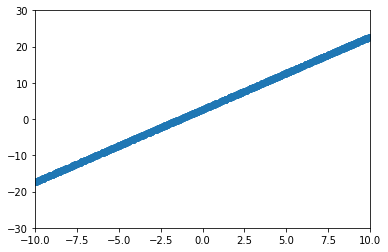

tensor(0.7921)


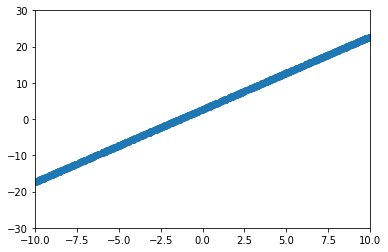

tensor(0.7876)


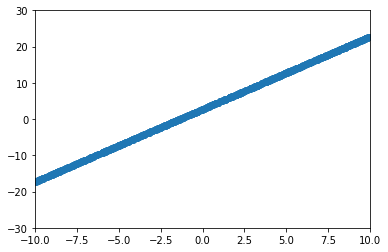

tensor(0.7839)


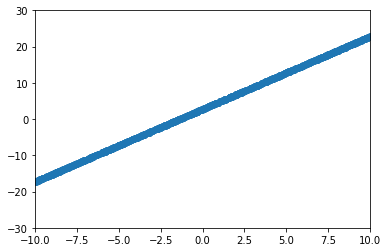

tensor(0.7810)


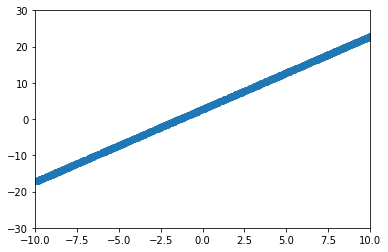

tensor(0.7785)


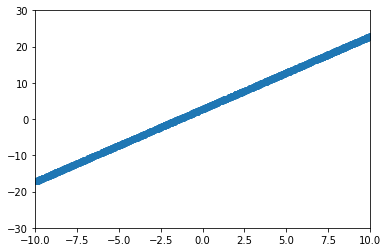

tensor(0.7763)


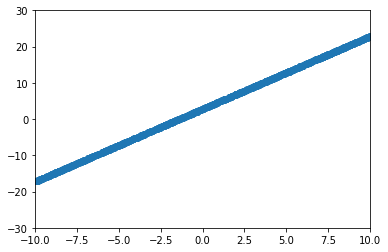

tensor(0.7746)


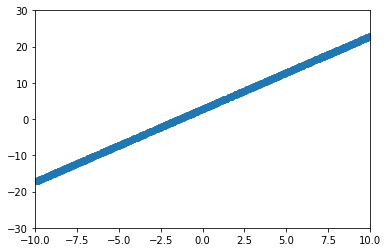

tensor(0.7732)


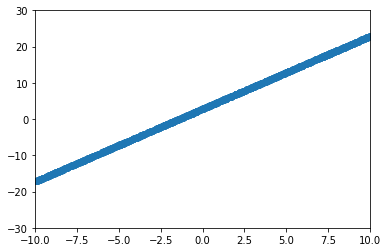

tensor(0.7719)


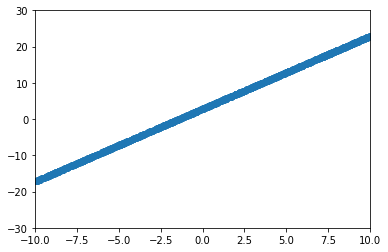

tensor(0.7708)


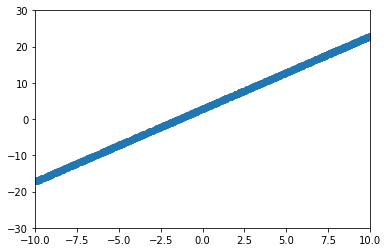

tensor(0.7698)


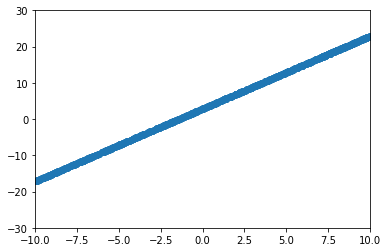

tensor(0.7689)


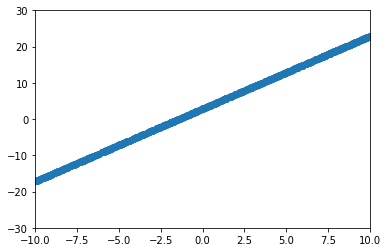

tensor(0.7682)


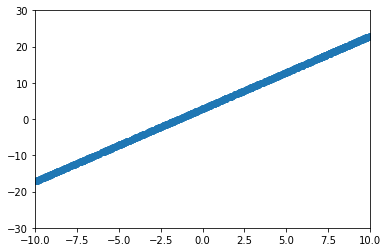

tensor(0.7676)


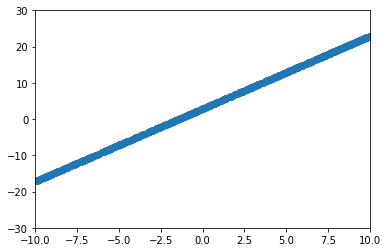

tensor(0.7671)


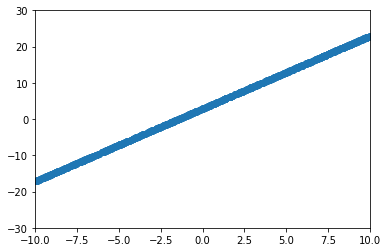

tensor(0.7667)


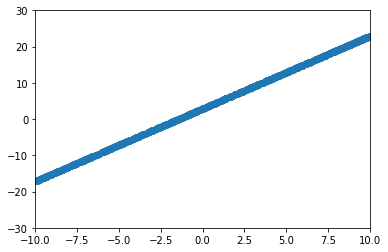

tensor(0.7665)


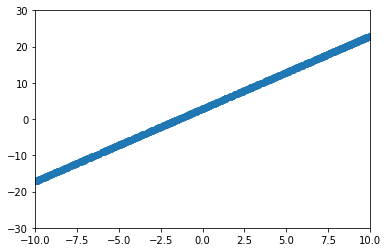

tensor(0.7663)


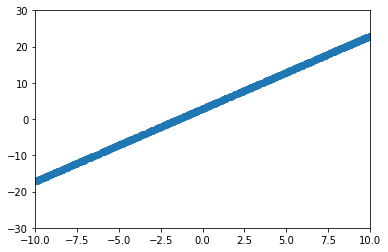

tensor(0.7661)


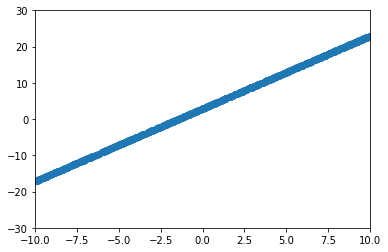

tensor(0.7659)


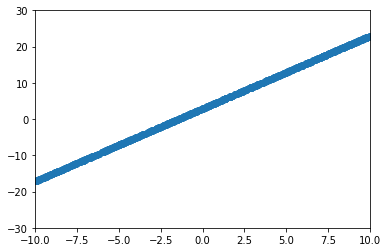

tensor(0.7658)


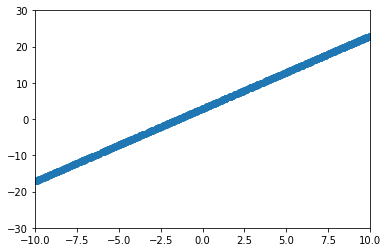

tensor(0.7657)


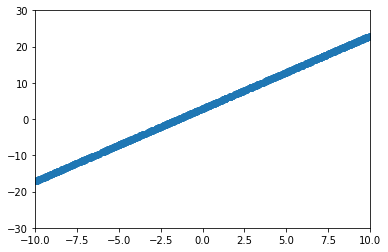

tensor(0.7656)


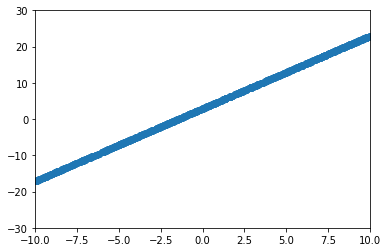

tensor(0.7655)


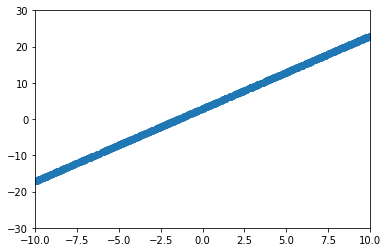

tensor(0.7655)


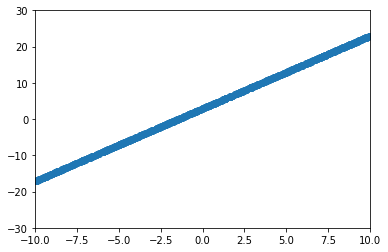

tensor(0.7654)


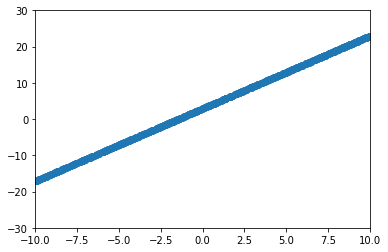

tensor(0.7654)


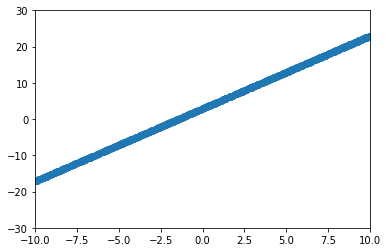

tensor(0.7654)


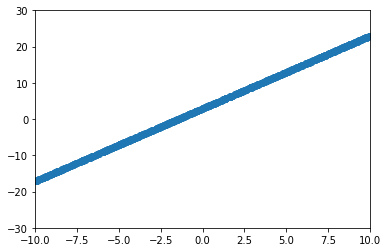

tensor(0.7653)


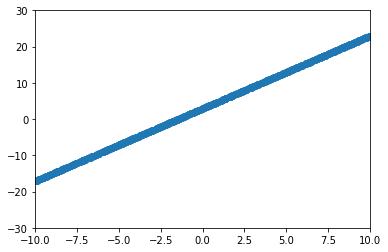

tensor(0.7653)


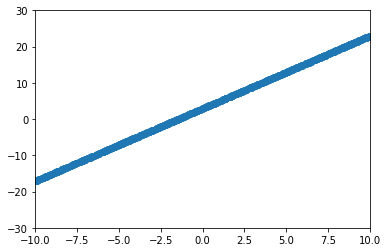

tensor(0.7653)


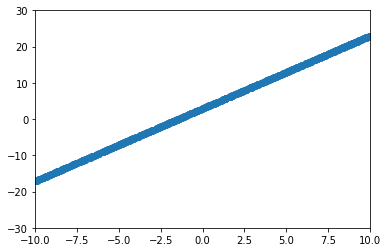

tensor(0.7653)


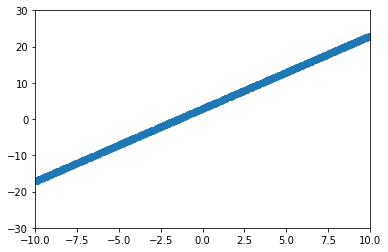

tensor(0.7653)


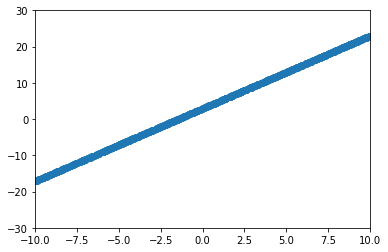

tensor(0.7653)


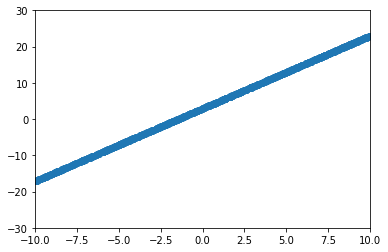

tensor(0.7653)


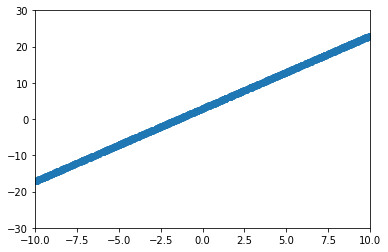

tensor(0.7653)


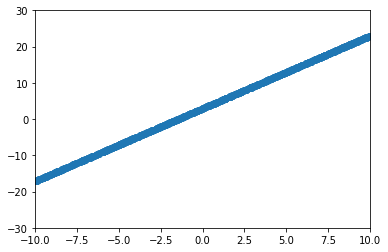

tensor(0.7653)


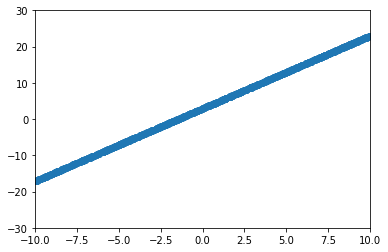

tensor(0.7653)


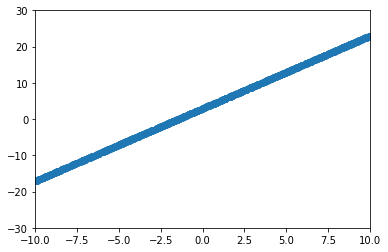

tensor(0.7653)


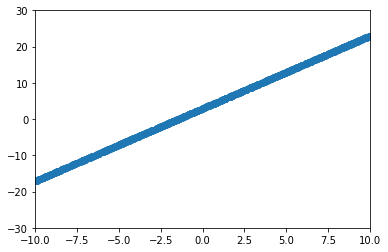

tensor(0.7653)


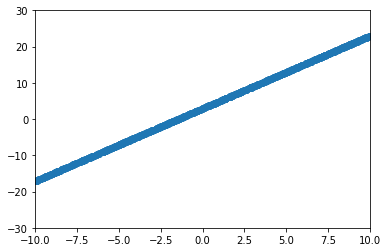

tensor(0.7653)


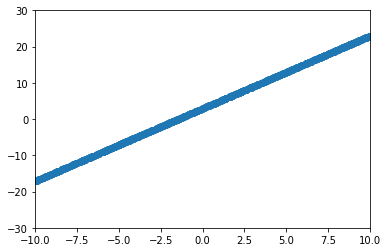

tensor(0.7653)


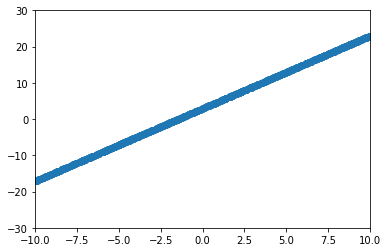

tensor(0.7653)


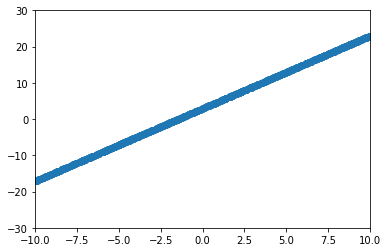

tensor(0.7653)


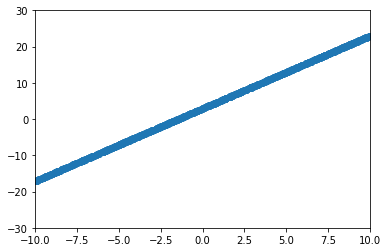

tensor(0.7653)


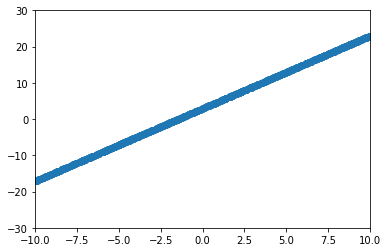

tensor(0.7653)


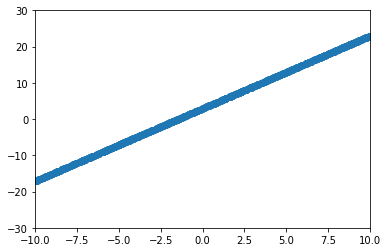

tensor(0.7653)


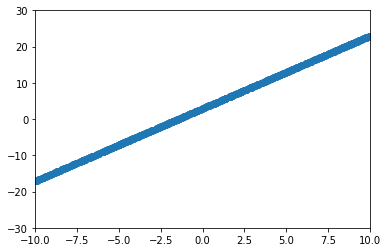

tensor(0.7653)


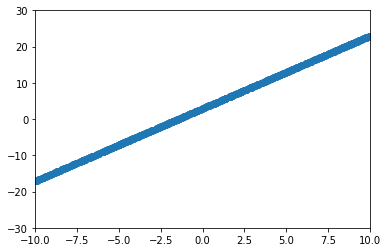

tensor(0.7653)


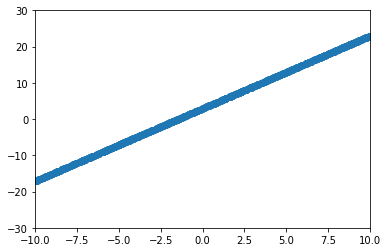

tensor(0.7653)


In [15]:
loss_arr = []
label = y_noise
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)

    loss_arr.append(loss.detach().numpy())

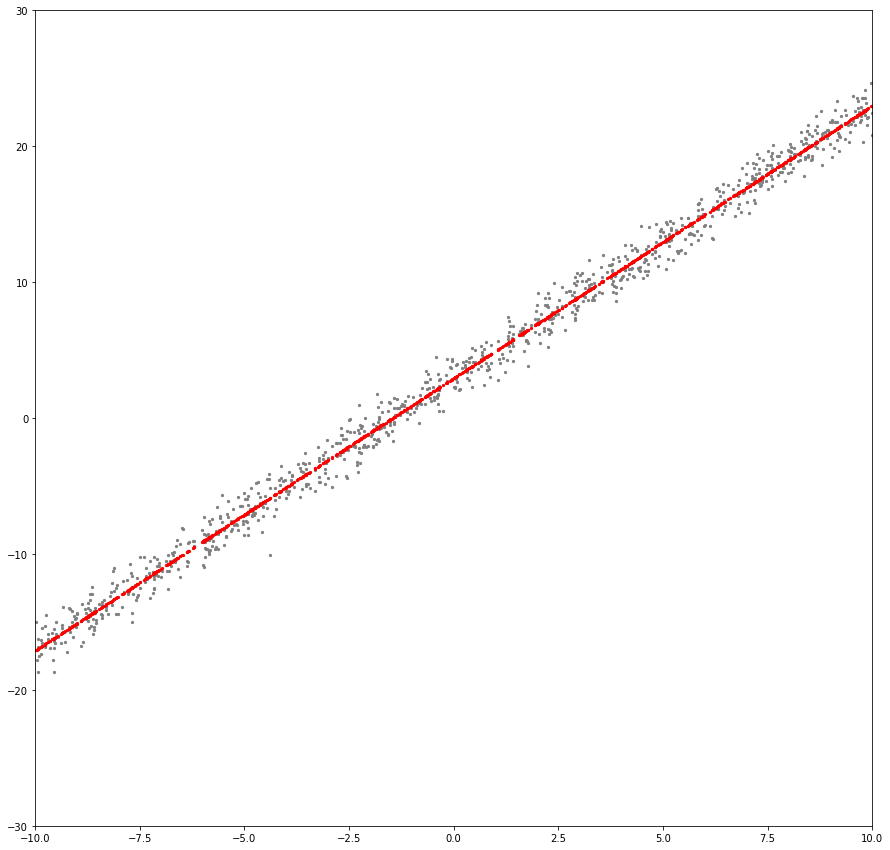

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

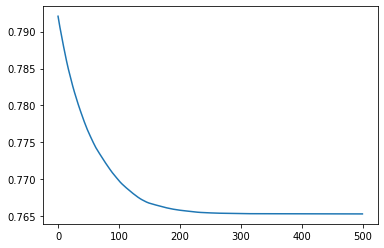

In [17]:
plt.plot(loss_arr)
plt.show()

In [19]:
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 2.004589557647705 
Bias:   2.9353325366973877
